In [1]:
import tensorflow

In [2]:
tensorflow.__version__

'2.5.0'

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [4]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
X = data.iloc[:,3:13]
y = data.iloc[:,13]

In [8]:
X = pd.get_dummies(X,prefix=['Geography','Gender'],drop_first=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [9]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=365)

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
model = Sequential()
# Hidden Layer
model.add(Dense(200,activation='relu'))
model.add(Dense(150,activation='sigmoid'))
model.add(Dense(110,activation='relu'))
model.add(Dense(90,activation='relu'))
# Output layer
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(X_train,y_train,epochs=50 , batch_size=30 , validation_split=0.20)

Epoch 1/50
214/214 [==============================] - 1s 3ms/step - loss: 0.5067 - accuracy: 0.7967 - val_loss: 0.4982 - val_accuracy: 0.7981
Epoch 2/50
214/214 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.7967 - val_loss: 0.4953 - val_accuracy: 0.7981
Epoch 3/50
214/214 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.7967 - val_loss: 0.4939 - val_accuracy: 0.7981
Epoch 4/50
214/214 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.7967 - val_loss: 0.4832 - val_accuracy: 0.7981
Epoch 5/50
214/214 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.7967 - val_loss: 0.4762 - val_accuracy: 0.7981
Epoch 6/50
214/214 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7966 - val_loss: 0.4777 - val_accuracy: 0.7981
Epoch 7/50
214/214 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.7978 - val_loss: 0.4523 - val_accuracy: 0.7975
Epoch 

In [21]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


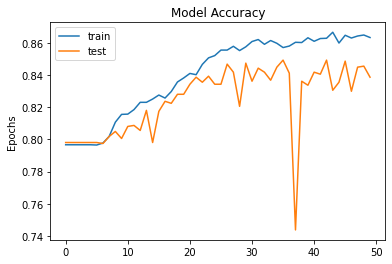

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylabel('Epochs')
plt.legend(['train','test'])

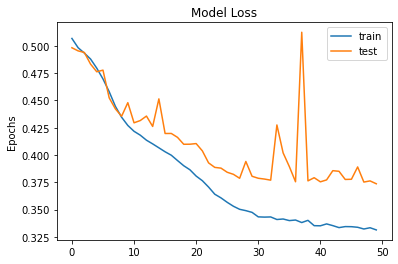

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.ylabel('Epochs')
plt.legend(['train','test'])

In [24]:
y_pred = model.predict(X_test)

In [25]:
print(y_pred)

[[0.05217451]
 [0.00701466]
 [0.16375223]
 ...
 [0.21339512]
 [0.01260826]
 [0.5109838 ]]


In [26]:
y_pred = (y_pred>0.5)

In [27]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred,y_test)
print(score)

0.855


In [30]:
model.save("churn_85.h5")